MAE: 5.52
RMSE: 6.93
R²: 0.19


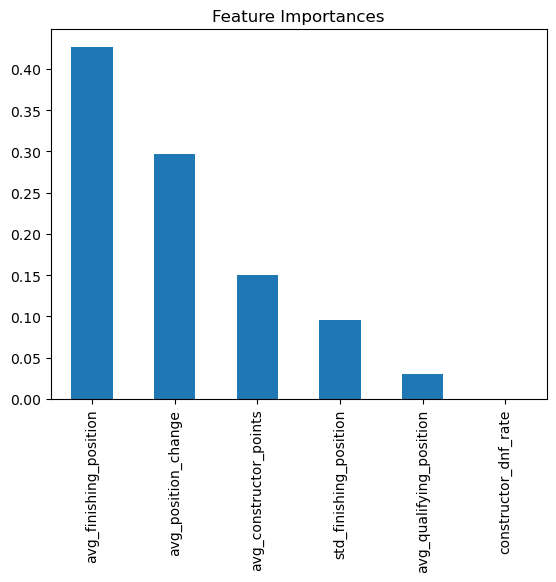

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# --- Load Engineered Features ---
features = pd.read_csv('Cleaned_Dataset/engineered_features.csv')

# --- Prepare Data ---
X = features.drop(['positionOrder', 'raceId', 'driverId', 'constructorId', 'circuitId'], axis=1)
y = features['positionOrder']

# --- Handle Missing Values (if any) ---
X = X.fillna(X.mean())

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

# --- Feature Importance ---
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.savefig('Modeling_feature_importance.png')
plt.show()